In [1]:

import pandas as pd
import pyarrow as pa
import os
import zipfile
import matplotlib.pyplot as plt 
from collections import Counter
import numpy as np
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
import pylab
import scipy.stats as stats

pd.options.display.float_format = '{:.2f}'.format

In [2]:
#pip freeze > requirements.txt
#aaaagggg
os.getcwd()
os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')

In [3]:
file = pd.read_csv(os.getcwd()+ '\Complete_SEDS.csv')
file1=file
codes = pd.read_csv(os.getcwd()+ '/residential_sector_codes.csv')
codes.head(1)

CLHCK
0  CLRCB

In [56]:
empty_rows = file1[file1.isna().any(axis=1)]

In [4]:
file1['Year'] = pd.to_datetime(file1['Year'], format='%Y')
file1=file1[~(file1['StateCode']=='US')]

In [59]:
file1['Data'].head(1)

0   0.00
Name: Data, dtype: float64

In [6]:
## take each unique variable in the file
	#Iterate over it and join them in 1 big dataframe
 

In [7]:
pqr = codes['CLHCK'].unique() #Taking the unique list of codes
abc = len(pqr) #The length of codes
new_list_of_titles = []
dfs = []
for i in pqr:
	if i not in new_list_of_titles:
		new_list_of_titles.append(i)
print(new_list_of_titles)




['CLRCB', 'CLRCD', 'CLRCP', 'CLRCV', 'DFRCB', 'DFRCD', 'DFRCP', 'DFRCV', 'ESRCB', 'ESRCD', 'ESRCP', 'ESRCV', 'ESRPP', 'GERCB', 'HLRCB', 'HLRCD', 'HLRCP', 'HLRCV', 'KSRCB', 'KSRCD', 'KSRCP', 'KSRCV', 'LORCB', 'NGRCB', 'NGRCD', 'NGRCP', 'NGRCV', 'PARCB', 'PARCD', 'PARCK', 'PARCP', 'PARCV', 'PERCD', 'PERCV', 'PERSB', 'PQRCB', 'PQRCD', 'PQRCP', 'PQRCV', 'SFRCB', 'SOR7P', 'SORCB', 'SOTCB', 'SOTGP', 'SOTXB', 'TERCB', 'TERCD', 'TERCV', 'TERPB', 'TNRCB', 'TNRSB', 'WDRCB', 'WDRCD', 'WDRCV', 'WDRSB', 'WDRXB']


In [8]:
general_consumption= file1[file1['MSN'].str.contains('ESRCV')]

In [9]:
# Convert new_list_of_titles to a single regex pattern
pattern1 = '|'.join(new_list_of_titles)

# Use str.contains() with the regex pattern
filtered_df11 = file1[file1['MSN'].str.contains(pattern1)]

In [10]:
merged_data = pd.merge(general_consumption, filtered_df11, on=["StateCode", "Year", "Data_Status"], how="left")


In [11]:
import pandas as pd
pivoted_data = merged_data.pivot_table(index=["StateCode", "Year", "Data_Status","MSN_x","Data_x"], columns="MSN_y", values="Data_y", aggfunc="first")
# Reset index to flatten the dataframe
pivoted_data.reset_index(inplace=True)


In [12]:
pivoted_data.head(10)

MSN_y StateCode       Year Data_Status  MSN_x  Data_x  CLRCB  CLRCD  CLRCP  \
0            AK 1970-01-01       2021F  ESRCV   16.70 233.00   2.47  13.00   
1            AK 1971-01-01       2021F  ESRCV   20.10 177.00   2.40  10.00   
2            AK 1972-01-01       2021F  ESRCV   22.00 199.00   2.28  11.00   
3            AK 1973-01-01       2021F  ESRCV   22.30  92.00   2.44   5.00   
4            AK 1974-01-01       2021F  ESRCV   25.30  92.00   2.54   5.00   
5            AK 1975-01-01       2021F  ESRCV   31.10  88.00   2.87   5.00   
6            AK 1976-01-01       2021F  ESRCV   36.60  71.00   2.78   4.00   
7            AK 1977-01-01       2021F  ESRCV   44.80  69.00   2.86   4.00   
8            AK 1978-01-01       2021F  ESRCV   49.70   0.00   0.00   0.00   
9            AK 1979-01-01       2021F  ESRCV   49.20   0.00   0.00   0.00   

MSN_y  CLRCV    DFRCB  ...  TERCD  TERCV  TERPB    TNRCB    TNRSB   WDRCB  \
0       0.60  7932.00  ...   2.30  38.90  81.80 17800.00 16912.00 1290.00   
1       0.40 10433.00  ...   2.34  47.70  93.80 21282.00 20418.00 1256.00   
2       0.50  8220.00  ...   2.49  49.00  90.80 20497.00 19681.00 1187.00   
3       0.20 10014.00  ...   2.73  49.80  86.20 19008.00 18263.00 1084.00   
4       0.20 10041.00  ...   3.44  61.50  85.40 18605.00 17871.00 1066.00   
5       0.30  9441.00  ...   3.23  78.10  96.10 25137.00 24166.00 1410.00   
6       0.20 11656.00  ...   3.49  94.00 100.30 28019.00 26954.00 1548.00   
7       0.20 13126.00  ...   3.81 111.20 107.70 30394.00 29152.00 1806.00   
8       0.00 15450.00  ...   4.14 134.70 116.20 33880.00 32520.00 1978.00   
9       0.00  5488.00  ...   5.34 116.70  95.50 23717.00 21836.00 2735.00   

MSN_y  WDRCD  WDRCV  WDRSB   WDRXB  
0       0.82   0.30 403.00  887.00  
1       0.86   0.30 392.00  864.00  
2       0.87   0.30 370.00  816.00  
3       1.00   0.30 338.00  745.00  
4       1.54   0.50 333.00  734.00  
5       1.62   0.70 440.00  970.00  
6       1.74   0.80 483.00 1065.00  
7       1.96   1.10 564.00 1242.00  
8       2.08   1.30 617.00 1361.00  
9       2.98   2.50 854.00 1881.00  

[10 rows x 60 columns]

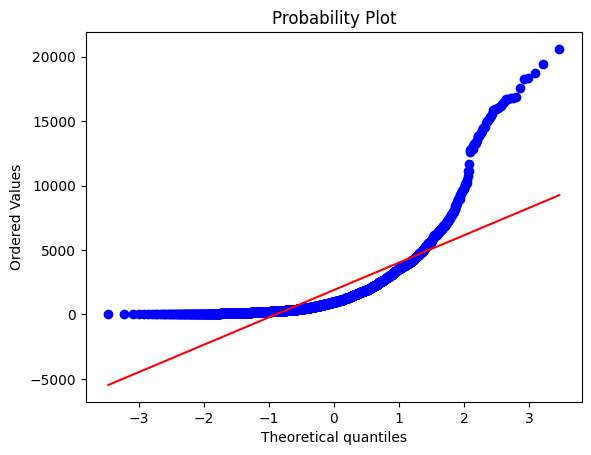

In [13]:


stats.probplot(pivoted_data['Data_x'], plot=pylab)
pylab.show()

In [14]:
needed_columns=(pivoted_data.columns[5:])

In [15]:
needed_columns1 =pivoted_data.iloc[:,4: ]

In [16]:
needed_columns1.iloc[:,:1]

MSN_y  Data_x
0       16.70
1       20.10
2       22.00
3       22.30
4       25.30
...       ...
2647   315.30
2648   310.20
2649   318.40
2650   319.90
2651   323.70

[2652 rows x 1 columns]

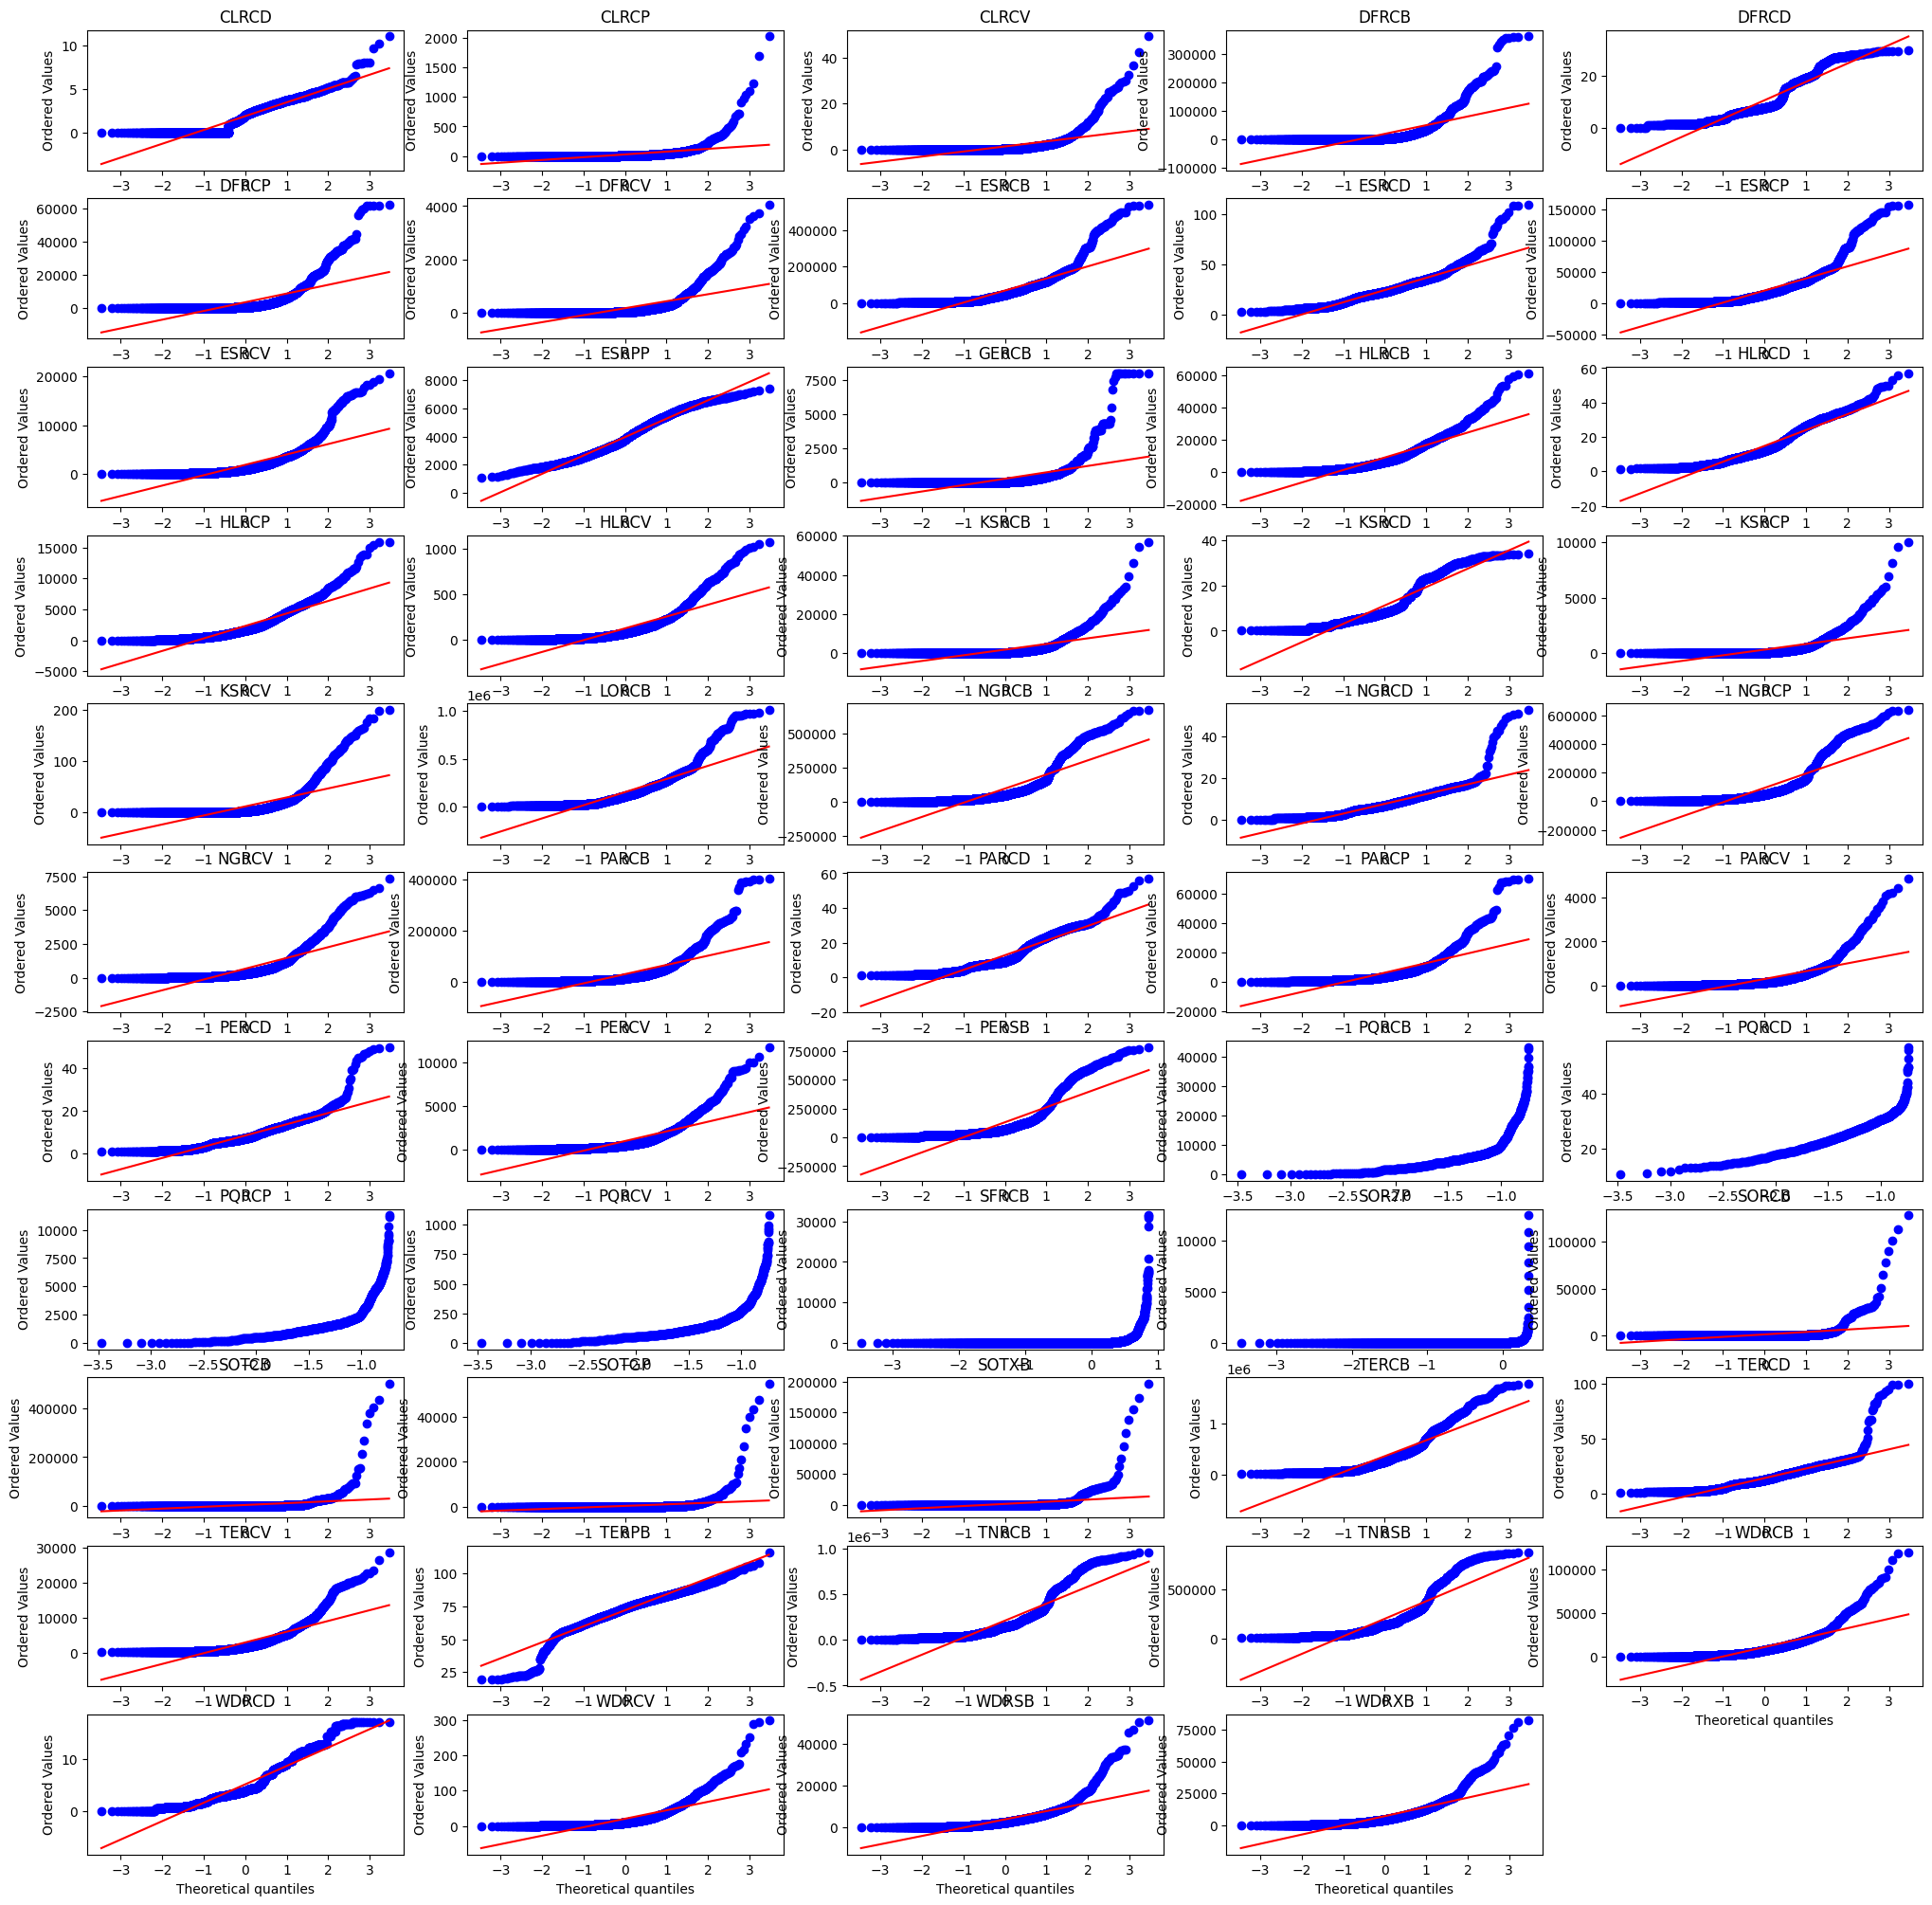

In [17]:
#This one works for plotting many plots. :) 

fig = plt.figure(figsize=(25,25))
for i,j in enumerate(needed_columns):
    if 0 < i < len(needed_columns):
        ax = fig.add_subplot(11,5 ,i)
        stats.probplot(needed_columns1[j], plot=pylab)
        ax.set_title(j)

In [19]:
needed_columns

Index(['CLRCB', 'CLRCD', 'CLRCP', 'CLRCV', 'DFRCB', 'DFRCD', 'DFRCP', 'DFRCV',
       'ESRCB', 'ESRCD', 'ESRCP', 'ESRCV', 'ESRPP', 'GERCB', 'HLRCB', 'HLRCD',
       'HLRCP', 'HLRCV', 'KSRCB', 'KSRCD', 'KSRCP', 'KSRCV', 'LORCB', 'NGRCB',
       'NGRCD', 'NGRCP', 'NGRCV', 'PARCB', 'PARCD', 'PARCP', 'PARCV', 'PERCD',
       'PERCV', 'PERSB', 'PQRCB', 'PQRCD', 'PQRCP', 'PQRCV', 'SFRCB', 'SOR7P',
       'SORCB', 'SOTCB', 'SOTGP', 'SOTXB', 'TERCB', 'TERCD', 'TERCV', 'TERPB',
       'TNRCB', 'TNRSB', 'WDRCB', 'WDRCD', 'WDRCV', 'WDRSB', 'WDRXB'],
      dtype='object', name='MSN_y')

In [23]:
## Correlation Coefficients maybe
newlist=[]
for i in needed_columns:
    newlist.append(['Annual Spending',i,(np.corrcoef(pivoted_data['Data_x'], pivoted_data[i]))])

In [100]:
corr = needed_columns1.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1.0, vmax=1.0)

That is just wayy too big

In [81]:
fewer=corr[(corr <0.2)&(corr >-0.2)]

In [86]:
corr1=corr.reset_index(drop=True)

In [87]:
fewer=corr1[(corr1 <0.2)&(corr1 >-0.2)]

In [101]:
corr_result = corr.stack() #Using the corr function is neat
results_now=corr_result[(corr_result != 1.0)&((corr_result > 0.5))]

To start some values that are n

In [152]:
not_correlated_features=pd.DataFrame(results_now['Data_x']).reset_index()

In [153]:
list_of_features_to_keep=list(not_correlated_features['MSN_y'])

In [154]:
list_of_features_to_keep.append('Data_x')
list_of_features_to_keep.append('Year')


Now that I have a list of features that are going to be useful I need to compare them to each other

In [155]:
shorter_now = pivoted_data[list_of_features_to_keep]

In [156]:
corr1=shorter_now.corr()
corr1.style.background_gradient(cmap='coolwarm',vmin=-1.0, vmax=1.0)

In [157]:
list_of_features_to_keep.append('StateCode')

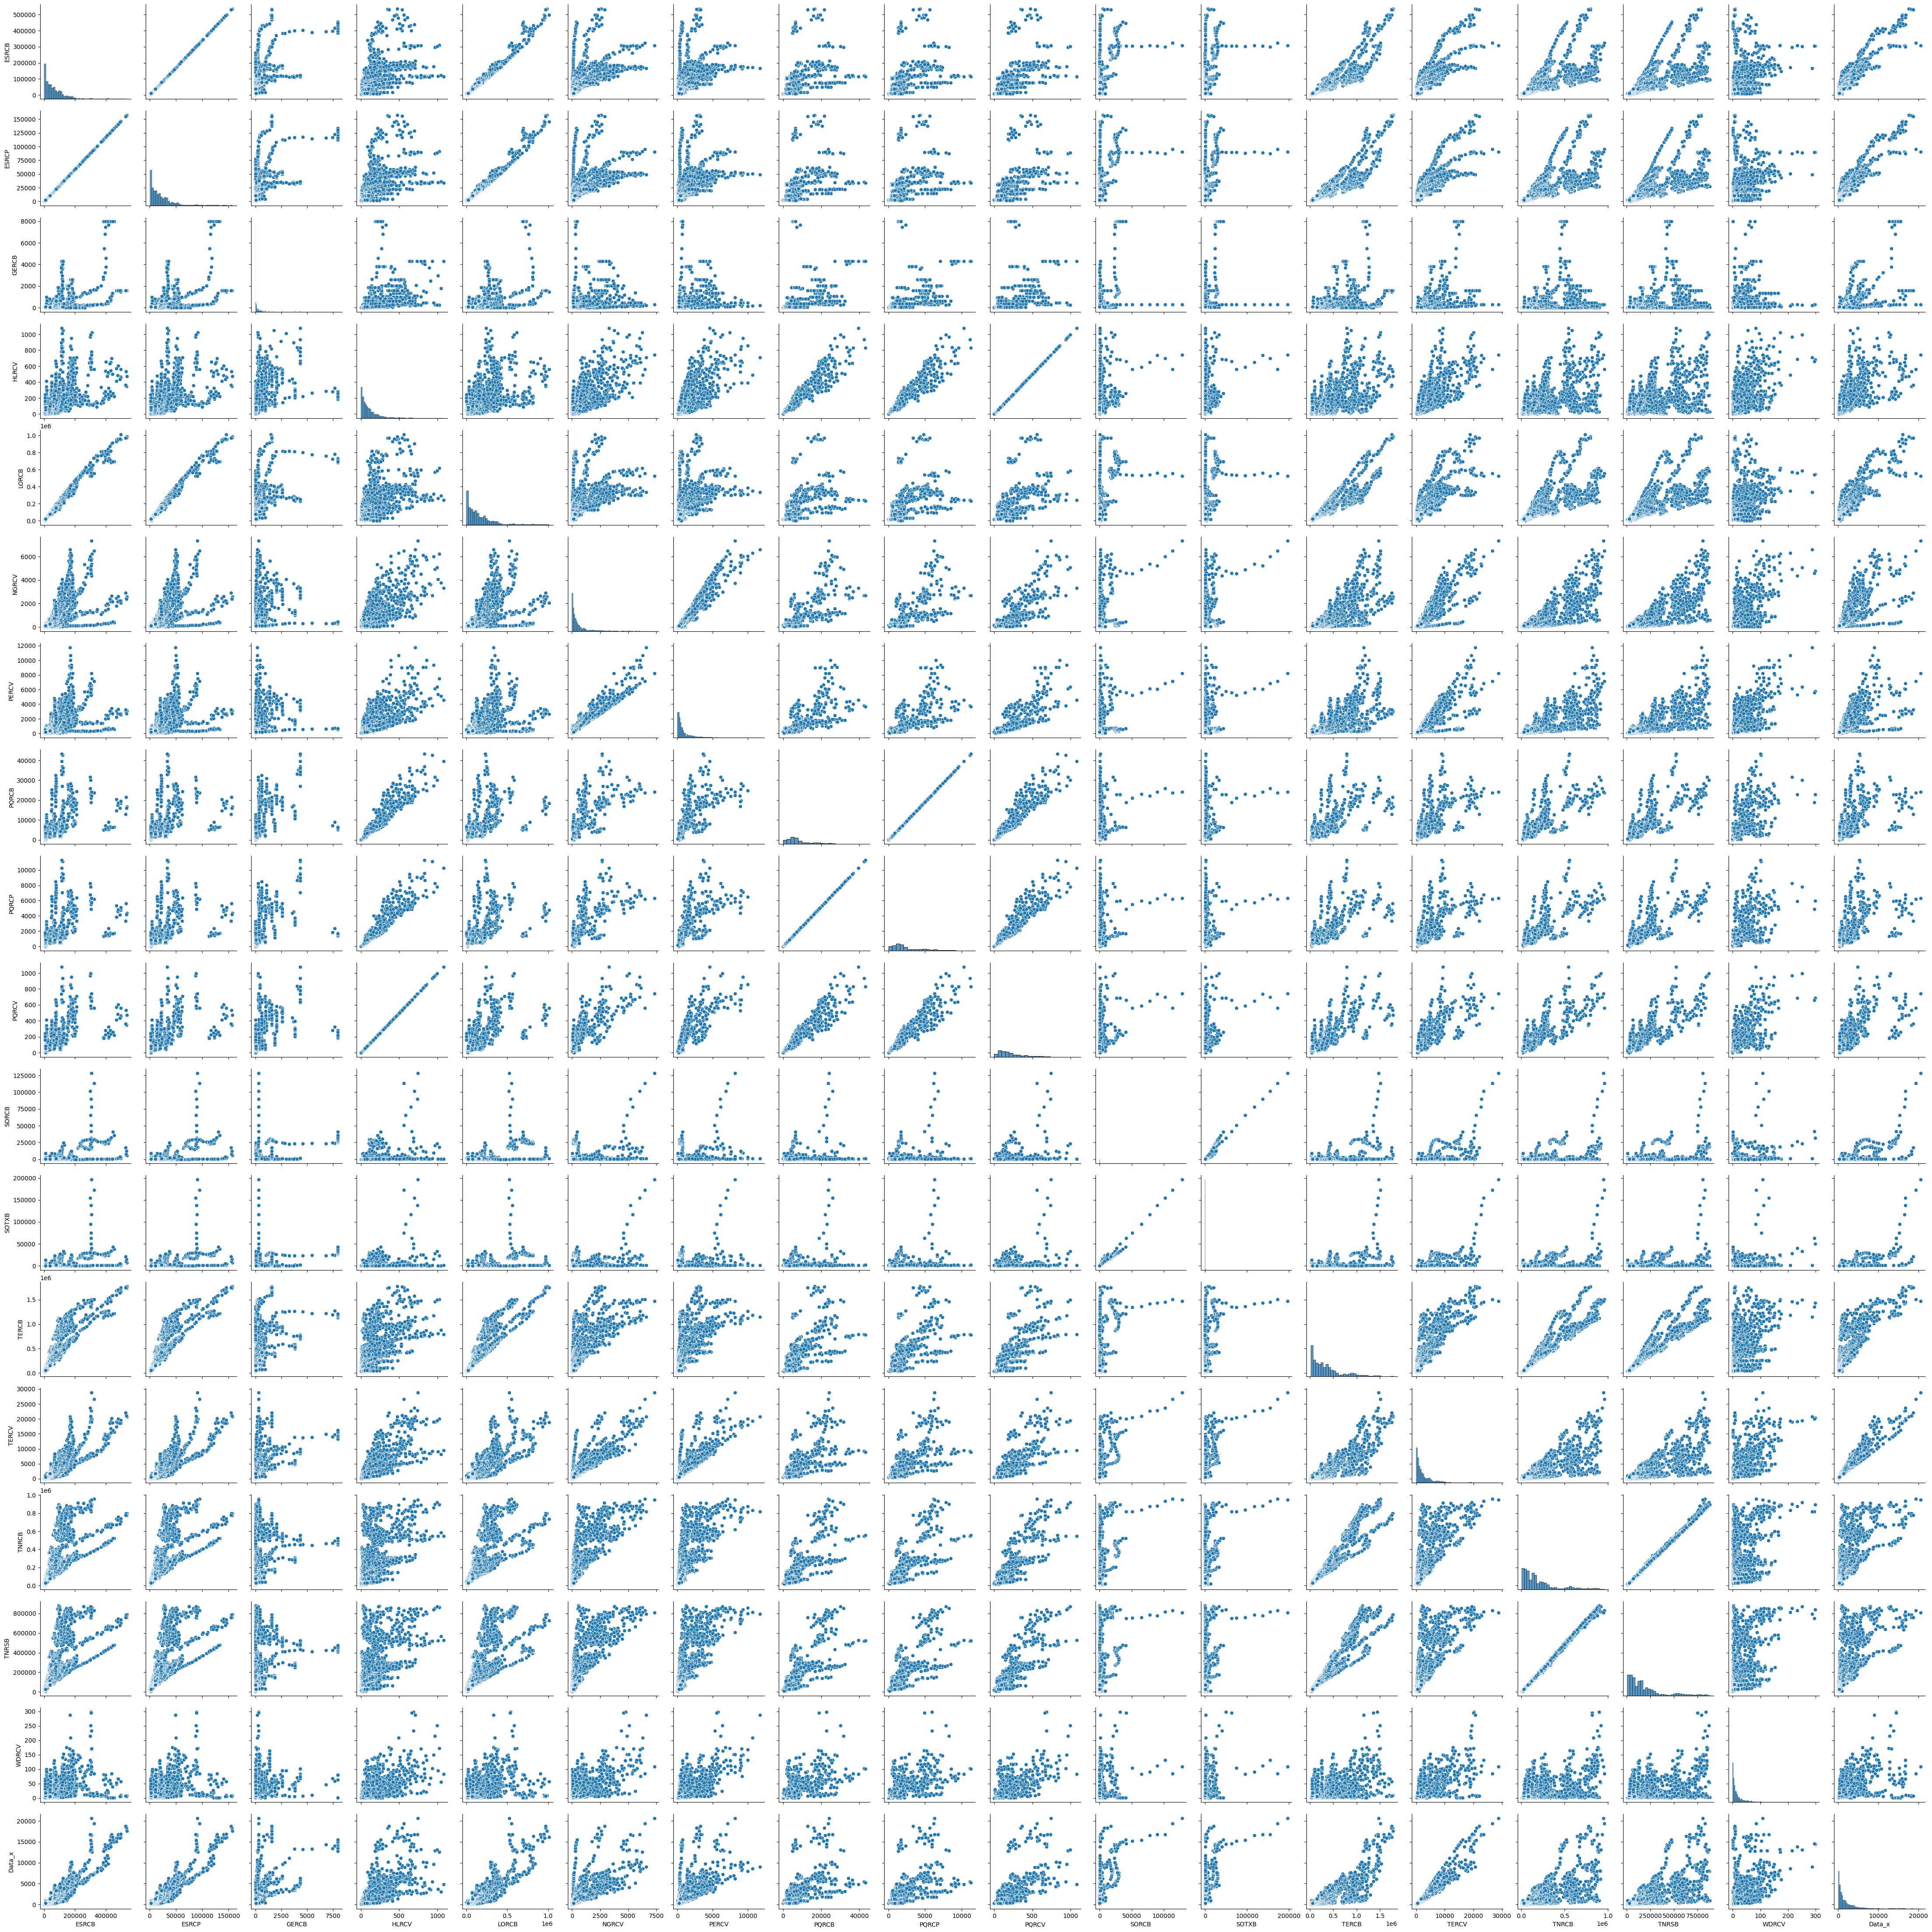

In [158]:
sns.pairplot(shorter_now)

For now going to apply model

In [165]:
shorter_now = pivoted_data[list_of_features_to_keep]

In [177]:
shorter_now= shorter_now.fillna(0)

In [178]:
#selected_column
shorter_now['Year1']=shorter_now['Year']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(shorter_now['Year1'])
shorter_now['Year1'] =le.transform(shorter_now['Year1'])
le = LabelEncoder()
le.fit(shorter_now['StateCode'])
shorter_now['StateCode'] = le.transform(shorter_now['StateCode'])

In [179]:
# shift column 'Name' to first position 
first_column = shorter_now.pop('Year') 
  
# insert column using insert(position,column_name, 
# first_column) function 
shorter_now.insert(0, 'Year', first_column)

In [180]:
# shift column 'Name' to first position 
first_column = shorter_now.pop('Data_x') 
  
# insert column using insert(position,column_name, 
# first_column) function 
shorter_now.insert(0, 'Data_x', first_column)

In [181]:
shorter_now

MSN_y  Data_x       Year   ESRCB   ESRCP  GERCB  HLRCV    LORCB  NGRCV  PERCV  \
0       16.70 1970-01-01 1798.00  527.00   0.00   0.60  7074.00   9.40  22.20   
1       20.10 1971-01-01 2155.00  631.00   0.00   0.70  8316.00  10.60  27.70   
2       22.00 1972-01-01 2143.00  628.00   0.00   0.80  8963.00  13.00  27.00   
3       22.30 1973-01-01 2342.00  686.00   0.00   1.80  9488.00   7.90  27.40   
4       25.30 1974-01-01 2574.00  754.00   0.00   1.20 10533.00   6.60  36.20   
...       ...        ...     ...     ...    ...    ...      ...    ...    ...   
2647   315.30 2017-01-01 9459.00 2772.00  70.00  82.10 20534.00 113.10 216.30   
2648   310.20 2018-01-01 9377.00 2748.00  70.00  80.00 20438.00 113.00 216.40   
2649   318.40 2019-01-01 9722.00 2849.00  70.00  74.20 21090.00 113.30 210.10   
2650   319.90 2020-01-01 9825.00 2880.00  70.00  54.70 21385.00 114.60 186.30   
2651   323.70 2021-01-01 9886.00 2897.00  70.00  82.10 21307.00 129.00 231.40   

MSN_y   PQRCB  ...  PQRCV  SORCB  SOTXB    TERCB  TERCV    TNRCB    TNRSB  \
0        0.00  ...   0.00   0.00   0.00 24873.00  38.90 17800.00 16912.00   
1        0.00  ...   0.00   0.00   0.00 29598.00  47.70 21282.00 20418.00   
2        0.00  ...   0.00   0.00   0.00 29461.00  49.00 20497.00 19681.00   
3        0.00  ...   0.00   0.00   0.00 28496.00  49.80 19008.00 18263.00   
4        0.00  ...   0.00   0.00   0.00 29137.00  61.50 18605.00 17871.00   
...       ...  ...    ...    ...    ...      ...    ...      ...      ...   
2647  3505.00  ...  82.10  28.00  45.00 51214.00 531.60 30680.00 28154.00   
2648  3275.00  ...  80.00  41.00  59.00 51489.00 526.60 31051.00 28500.00   
2649  3513.00  ...  74.20  61.00  84.00 53932.00 528.60 32842.00 30241.00   
2650  2994.00  ...  54.70  91.00 116.00 52335.00 506.20 30951.00 28498.00   
2651  3351.00  ...  82.10 132.00 160.00 52210.00 555.10 30903.00 28518.00   

MSN_y  WDRCV  StateCode  Year1  
0       0.30          0      0  
1       0.30          0      1  
2       0.30          0      2  
3       0.30          0      3  
4       0.50          0      4  
...      ...        ...    ...  
2647   19.00         50     47  
2648   21.10         50     48  
2649   20.60         50     49  
2650   15.80         50     50  
2651   18.00         50     51  

[2652 rows x 21 columns]

In [182]:
X1 =shorter_now.loc[shorter_now['Year']<'2021-01-01']
X2 = shorter_now.loc[shorter_now['Year']>='2021-01-01']

In [183]:
y_train=X1['Data_x'].reset_index(drop=True) # Separating all of the data
y_test=X2['Data_x'].reset_index(drop=True)
X_train = X1.iloc[:,2: ]
X_test = X2.iloc[:,2: ]

In [184]:
X_train

MSN_y   ESRCB   ESRCP  GERCB  HLRCV    LORCB  NGRCV  PERCV   PQRCB  PQRCP  \
0     1798.00  527.00   0.00   0.60  7074.00   9.40  22.20    0.00   0.00   
1     2155.00  631.00   0.00   0.70  8316.00  10.60  27.70    0.00   0.00   
2     2143.00  628.00   0.00   0.80  8963.00  13.00  27.00    0.00   0.00   
3     2342.00  686.00   0.00   1.80  9488.00   7.90  27.40    0.00   0.00   
4     2574.00  754.00   0.00   1.20 10533.00   6.60  36.20    0.00   0.00   
...       ...     ...    ...    ...      ...    ...    ...     ...    ...   
2646  9387.00 2751.00  70.00  51.50 20329.00 102.10 169.70 2597.00 676.00   
2647  9459.00 2772.00  70.00  82.10 20534.00 113.10 216.30 3505.00 913.00   
2648  9377.00 2748.00  70.00  80.00 20438.00 113.00 216.40 3275.00 853.00   
2649  9722.00 2849.00  70.00  74.20 21090.00 113.30 210.10 3513.00 915.00   
2650  9825.00 2880.00  70.00  54.70 21385.00 114.60 186.30 2994.00 779.00   

MSN_y  PQRCV  SORCB  SOTXB    TERCB  TERCV    TNRCB    TNRSB  WDRCV  \
0       0.00   0.00   0.00 24873.00  38.90 17800.00 16912.00   0.30   
1       0.00   0.00   0.00 29598.00  47.70 21282.00 20418.00   0.30   
2       0.00   0.00   0.00 29461.00  49.00 20497.00 19681.00   0.30   
3       0.00   0.00   0.00 28496.00  49.80 19008.00 18263.00   0.30   
4       0.00   0.00   0.00 29137.00  61.50 18605.00 17871.00   0.50   
...      ...    ...    ...      ...    ...      ...      ...    ...   
2646   51.50  20.00  33.00 49014.00 476.00 28686.00 26509.00  14.60   
2647   82.10  28.00  45.00 51214.00 531.60 30680.00 28154.00  19.00   
2648   80.00  41.00  59.00 51489.00 526.60 31051.00 28500.00  21.10   
2649   74.20  61.00  84.00 53932.00 528.60 32842.00 30241.00  20.60   
2650   54.70  91.00 116.00 52335.00 506.20 30951.00 28498.00  15.80   

MSN_y  StateCode  Year1  
0              0      0  
1              0      1  
2              0      2  
3              0      3  
4              0      4  
...          ...    ...  
2646          50     46  
2647          50     47  
2648          50     48  
2649          50     49  
2650          50     50  

[2601 rows x 19 columns]

In [185]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)


In [186]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
linear_model1=linear_model.LinearRegression()
linear_model=LinearRegression().fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
y_true =y_test

In [189]:
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1

Data_x        0
0    469.90   469.90
1   4092.40  4092.40
2   2131.70  2131.70
3   4655.90  4655.90
4  20604.40 20604.43
5   2696.10  2696.10
6   2868.40  2868.39
7    330.90   330.91
8    647.10   647.10
9  15518.20 15518.19
10  7339.60  7339.60
11   946.20   946.30
12  1864.60  1864.60
13   944.60   944.70
14  6167.80  6167.81
15  4476.50  4476.50
16  1787.50  1787.50
17  3040.80  3040.80
18  3351.60  3351.70
19  4647.90  4647.89
20  3669.20  3669.20
21   861.60   861.60
22  6289.80  6289.79
23  3138.30  3138.30
24  4071.50  4071.50
25  2145.80  2145.80
26   623.90   624.00
27  6897.00  6897.09
28   530.30   530.41
29  1128.00  1128.00
30   959.20   959.29
31  4921.10  4921.10
32   958.10   958.10
33  1651.80  1651.80
34 10161.80 10161.69
35  6789.20  6789.19
36  2612.40  2612.50
37  2307.40  2307.30
38  7697.60  7697.58
39   698.40   698.40
40  4037.50  4037.40
41   616.50   616.50
42  4741.60  4741.60
43 18772.30 18772.29
44  1142.20  1142.21
45  5579.60  5579.49
46   418.70   418.80
47  3843.70  3843.69
48  3320.20  3320.30
49  1343.20  1343.30
50   323.70   323.70

In [191]:
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1

true  predicted  how_off
0    469.90     469.90    -0.00
1   4092.40    4092.40     0.00
2   2131.70    2131.70    -0.00
3   4655.90    4655.90    -0.00
4  20604.40   20604.43    -0.00
5   2696.10    2696.10    -0.00
6   2868.40    2868.39     0.00
7    330.90     330.91    -0.00
8    647.10     647.10    -0.00
9  15518.20   15518.19     0.00
10  7339.60    7339.60     0.00
11   946.20     946.30    -0.01
12  1864.60    1864.60    -0.00
13   944.60     944.70    -0.01
14  6167.80    6167.81    -0.00
15  4476.50    4476.50    -0.00
16  1787.50    1787.50    -0.00
17  3040.80    3040.80     0.00
18  3351.60    3351.70    -0.00
19  4647.90    4647.89     0.00
20  3669.20    3669.20     0.00
21   861.60     861.60     0.00
22  6289.80    6289.79     0.00
23  3138.30    3138.30     0.00
24  4071.50    4071.50     0.00
25  2145.80    2145.80     0.00
26   623.90     624.00    -0.02
27  6897.00    6897.09    -0.00
28   530.30     530.41    -0.02
29  1128.00    1128.00    -0.00
30   959.20     959.29    -0.01
31  4921.10    4921.10    -0.00
32   958.10     958.10     0.00
33  1651.80    1651.80    -0.00
34 10161.80   10161.69     0.00
35  6789.20    6789.19     0.00
36  2612.40    2612.50    -0.00
37  2307.40    2307.30     0.00
38  7697.60    7697.58     0.00
39   698.40     698.40    -0.00
40  4037.50    4037.40     0.00
41   616.50     616.50    -0.00
42  4741.60    4741.60    -0.00
43 18772.30   18772.29     0.00
44  1142.20    1142.21    -0.00
45  5579.60    5579.49     0.00
46   418.70     418.80    -0.02
47  3843.70    3843.69     0.00
48  3320.20    3320.30    -0.00
49  1343.20    1343.30    -0.01
50   323.70     323.70     0.00